In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_df=pd.read_excel("C:\\Users\\naray\\Desktop\\Case Studies\\1. Predicting Credit Card Spend & Identifying Key Drivers\\Data Set_CC.xlsx",sheetname="customer_dbase")

C:\Users\naray\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(credit_df)

Number of variables,130
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,59
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,20


##### Creating dependent Y and droping related variables

In [4]:
credit_df['total_spend']=credit_df['cardspent']+credit_df['card2spent']

In [5]:
credit_df.drop(["cardspent","card2spent","custid"],axis=1,inplace=True)

credit_df.shape

(5000, 128)

### `Categorical Variables treatment`

In [6]:
credit_df_cat=credit_df[['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat',
                         'retire','inccat','default','jobsat','marital','spousedcat','homeown','hometype','address',
                         'addresscat','cars','carown','cartype','carcatvalue','carbought','carbuy','commute','commutecat',
                         'commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
                         'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty',
                         'polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
                         'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast',
                         'churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
                         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod'
                         ,'owngame','ownfax','news','response_01','response_02','response_03']]

##### Missing value treatment

In [7]:
credit_df_cat.columns[credit_df_cat.isnull().any()]

Index(['townsize'], dtype='object')

In [8]:
credit_df_cat['townsize'].fillna(credit_df_cat['townsize'].mode(),inplace=True)

C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


##### Dummy variables creation

In [9]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [10]:
cat_vars=list(credit_df_cat.columns)

In [11]:
for c_feature in cat_vars:
    credit_df_cat[c_feature] = credit_df_cat[c_feature].astype('category')
    credit_df_cat = create_dummies(credit_df_cat , c_feature )

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### `Numerical Variables treatment`

In [12]:
num_vars=credit_df.columns.difference(['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union',
                                       'employ','empcat','retire','inccat','default','jobsat','marital','spousedcat',
                                       'homeown','hometype','address','addresscat','cars','carown','cartype','carcatvalue',
                                       'carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle',
                                       'commutecarpool','commutebus','commuterail','commutepublic','commutebike',
                                       'commutewalk','commutenonmotor','telecommute','reason','polview','polparty',
                                       'polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure',
                                       'cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure',
                                       'card2tenurecat','active','bfast','churn','tollfree','equip','callcard','wireless',
                                       'multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
                                       'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
                                       'response_01','response_02','response_03'])

In [13]:
credit_df_num=credit_df[num_vars]

In [14]:
credit_df_num.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,total_spend,wiremon,wireten
0,20,14.25,60.0,14.3,22.0,1.200909,11.1,15,29.50,126.1,...,0,0,3,-1,5,29.0,161.05,149.46,0.00,0.00
1,22,16.00,610.0,6.8,29.0,1.222020,18.6,17,54.85,1975.0,...,0,0,2,-1,39,0.0,0.00,77.54,45.65,1683.55
2,67,23.00,1410.0,18.8,24.0,0.928620,9.9,14,0.00,0.0,...,0,0,3,13,65,0.0,0.00,359.97,0.00,0.00
3,23,21.00,685.0,8.7,38.0,0.022800,5.7,16,0.00,0.0,...,0,0,5,18,36,0.0,0.00,359.41,0.00,0.00
4,26,17.25,360.0,10.6,32.0,0.214659,1.7,16,0.00,0.0,...,0,0,4,13,21,16.5,387.70,507.83,19.05,410.80


##### Missing value treatment

In [15]:
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_df_num=credit_df_num.apply(lambda x: Missing_imputation(x))

##### Outlier capping

In [16]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_df_num=credit_df_num.apply(lambda x: outlier_capping(x))


C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


### `Concatenating numerical and categorical dataframes`

In [17]:
credit_df_new= pd.concat([credit_df_num,credit_df_cat], axis=1)

In [18]:
credit_df_new.shape

(5000, 400)

### `Assumption 1 - Residuals or Y should be normally distributed`

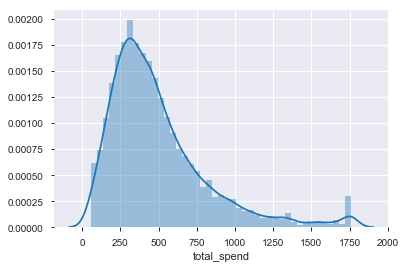

In [19]:
import seaborn as sns
sns.distplot(credit_df_new.total_spend)

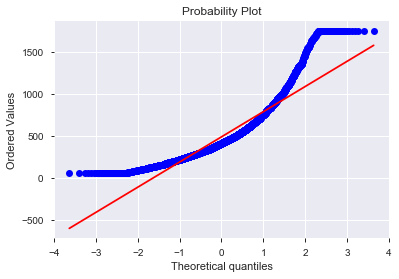

In [20]:
from scipy import stats
import pylab

stats.probplot(credit_df_new.total_spend, dist="norm", plot=pylab )
pylab.show()

In [21]:
from scipy import stats

# transform training data & save lambda value
credit_df_new['bc_total_spend'],fitted_lambda = stats.boxcox(credit_df_new['total_spend'])

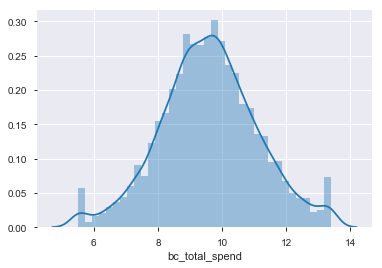

In [22]:
sns.distplot(credit_df_new.bc_total_spend)

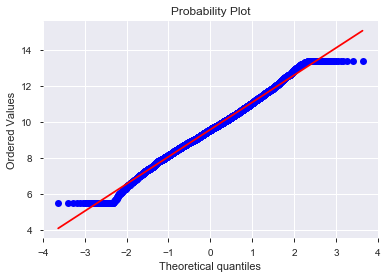

In [23]:
stats.probplot(credit_df_new.bc_total_spend, dist="norm", plot=pylab )
pylab.show()

In [24]:
credit_df_new.drop(["total_spend"],axis=1,inplace=True)

### `Splitting data into training & testing`

In [25]:
feature_columns=credit_df_new.columns.difference(['bc_total_spend'])

In [26]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(credit_df_new[feature_columns],
                                              credit_df_new['bc_total_spend'],
                                              test_size=.2,
                                              random_state=12)

### `Building Random Forest model for variable selection`

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_estimators':np.arange(10,50)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(train_x,train_y)  

In [68]:
tree.best_params_

{'n_estimators': 21}

In [28]:
radm=RandomForestRegressor(oob_score=True,n_estimators=21)
radm.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [29]:
indices = np.argsort(radm.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm.feature_importances_[indices[f]]]

In [30]:
feature_rank

,rank,feature,importance
0,1,lninc,9.323041e-02
1,2,income,9.051826e-02
2,3,card_3,2.633501e-02
3,4,card_2,2.242136e-02
4,5,card_4,2.094471e-02
5,6,debtinc,2.082560e-02
6,7,commutetime,2.021091e-02
7,8,carvalue,1.956586e-02
8,9,hourstv,1.762815e-02
9,10,reason_2,1.728042e-02


In [31]:
x=feature_rank.loc[0:75,['feature']]
x=x['feature'].tolist()
print(x)

['lninc', 'income', 'card_3', 'card_2', 'card_4', 'debtinc', 'commutetime', 'carvalue', 'hourstv', 'reason_2', 'age', 'lncreddebt', 'creddebt', 'lncardmon', 'othdebt', 'ed', 'lnothdebt', 'pets', 'tenure', 'lncardten', 'cardmon', 'card_5', 'spoused', 'lnlongmon', 'cardten', 'lnlongten', 'longmon', 'lnequipmon', 'lntollten', 'lntollmon', 'reside', 'card2_3', 'card2_2', 'tollmon', 'gender_1', 'longten', 'pets_freshfish', 'tollten', 'equipten', 'equipmon', 'pets_cats', 'lnequipten', 'lnwiremon', 'pets_dogs', 'wiremon', 'lnwireten', 'carown_0', 'vote_1', 'carbought_1', 'address_22', 'townsize_3.0', 'spousedcat_1', 'carbought_0', 'polparty_1', 'owngame_1', 'carbuy_1', 'commuterail_1', 'bfast_3', 'card2benefit_2', 'active_1', 'card2type_2', 'jobsat_4', 'polview_5', 'cars_3', 'card2benefit_4', 'ebill_1', 'card2fee_1', 'region_3', 'cartype_0', 'cardbenefit_4', 'wireten', 'birthmonth_October', 'region_5', 'ownpc_1', 'homeown_1', 'pets_birds']


In [32]:
# Create df with selected features
rf_features=['income', 'lninc', 'card_3', 'card_2', 'carvalue', 'card_4', 'commutetime', 'reason_2', 'debtinc', 'hourstv', 'creddebt', 'age', 'lncreddebt', 'tenure', 'lncardmon', 'lnothdebt', 'ed', 'othdebt', 'pets', 'lncardten', 'lntollmon', 'cardmon', 'longmon', 'card_5', 'lnlongmon', 'reside', 'spoused', 'cardten', 'lntollten', 'lnequipmon', 'lnlongten', 'tollten', 'longten', 'tollmon', 'lnwiremon', 'card2_2', 'card2_3', 'pets_freshfish', 'lnequipten', 'gender_1', 'pets_dogs', 'equipten', 'wireten', 'pets_cats', 'address_22', 'equipmon', 'wiremon', 'jobsat_4', 'commutebus_1', 'card2benefit_4']

rf_features.append('bc_total_spend')
df_rf=credit_df_new[rf_features]

df_rf.head(5)


,income,lninc,card_3,card_2,carvalue,card_4,commutetime,reason_2,debtinc,hourstv,...,equipten,wireten,pets_cats,address_22,equipmon,wiremon,jobsat_4,commutebus_1,card2benefit_4,bc_total_spend
0,31.0,3.433987,1,0,14.3,0,22.0,0,11.1,13,...,126.1,0.00,0,0,29.50,0.00,0,0,0,7.323447
1,15.0,2.708050,0,1,6.8,0,29.0,0,18.6,18,...,1975.0,1683.55,0,0,54.85,45.65,0,1,0,6.039640
2,35.0,3.555348,0,1,18.8,0,24.0,1,9.9,21,...,0.0,0.00,2,0,0.00,0.00,1,1,0,9.243615
3,20.0,2.995732,0,1,8.7,0,38.0,0,5.7,26,...,0.0,0.00,0,0,0.00,0.00,0,0,1,9.239995
4,23.0,3.135494,0,0,10.6,1,32.0,0,1.7,27,...,0.0,410.80,0,0,0.00,19.05,0,0,0,10.063779


## `Assumption 2 - Multicollinearity check`

In [33]:
import statsmodels as sm

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [35]:
del rf_features[-1]

In [36]:
%%capture
#gather features
features = "+".join(rf_features)

In [37]:
features

'income+lninc+card_3+card_2+carvalue+card_4+commutetime+reason_2+debtinc+hourstv+creddebt+age+lncreddebt+tenure+lncardmon+lnothdebt+ed+othdebt+pets+lncardten+lntollmon+cardmon+longmon+card_5+lnlongmon+reside+spoused+cardten+lntollten+lnequipmon+lnlongten+tollten+longten+tollmon+lnwiremon+card2_2+card2_3+pets_freshfish+lnequipten+gender_1+pets_dogs+equipten+wireten+pets_cats+address_22+equipmon+wiremon+jobsat_4+commutebus_1+card2benefit_4'

In [38]:
# get y and X dataframes based on this regression:
y, X = dmatrices('bc_total_spend~' + features,df_rf, return_type='dataframe')

In [39]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [40]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,1794.453742,Intercept
23,149.115976,longmon
33,117.711230,longten
25,33.819284,lnlongmon
31,30.776161,lnlongten
14,23.793528,tenure
32,21.747612,tollten
42,20.932674,equipten
46,15.475541,equipmon
34,15.289456,tollmon


In [41]:
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars

['tenure',
 'pets',
 'cardmon',
 'longmon',
 'lnlongmon',
 'cardten',
 'lnlongten',
 'tollten',
 'longten',
 'tollmon',
 'pets_freshfish',
 'equipten',
 'wireten',
 'equipmon',
 'wiremon']

In [42]:
# dropping variables that have VIF greater than 10
df_rf.drop(drop_vars,axis=1,inplace=True)


C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
df_rf.shape

(5000, 36)

### `Assumption 3 - All x variables should have a linear relationship with Y`

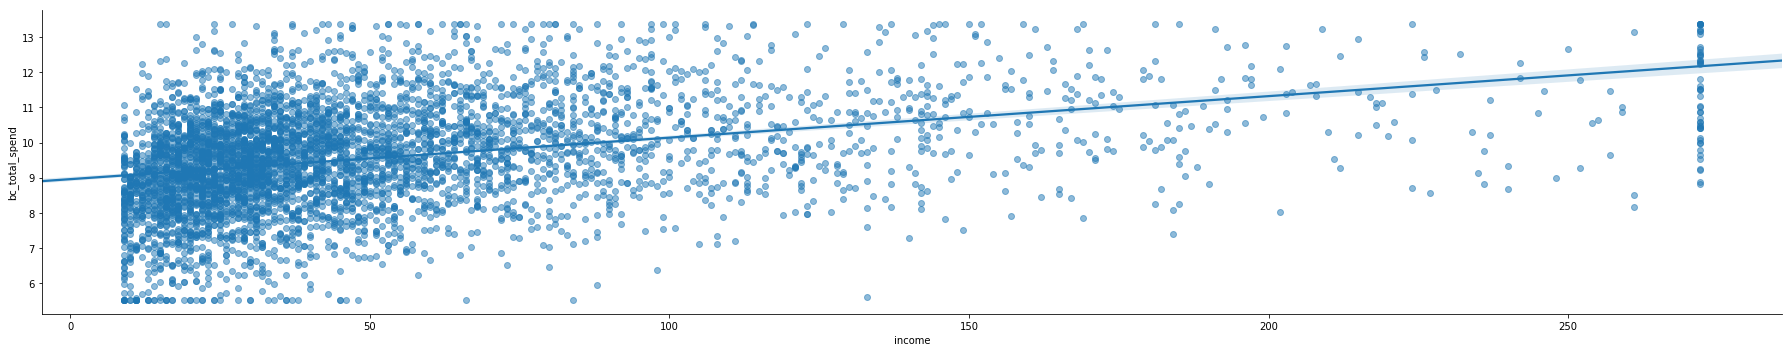

In [191]:
sns.lmplot(x="income",y="bc_total_spend",data=df_rf,aspect=5,scatter_kws={'alpha':0.5})

###  `Splitting data for training and testing`

In [190]:
# Dropping variables one at a time which have p-values greater than 5%
feature_columns=df_rf.columns.difference(['bc_total_spend','address_22','pets_cats','lncardmon','lnequipten','spoused'
                                         ,'creddebt','reside','othdebt','debtinc','lnothdebt','jobsat_4','income','carvalue',
                                         'card2benefit_4','commutebus_1','hourstv','lnwiremon','pets_dogs','lncardten',
                                         'commutetime','lntollten','lntollmon','lnequipmon'])

In [191]:
train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['bc_total_spend'],
                                               test_size=.2,
                                               random_state=123)

### `Building Linear Regression Model`

In [192]:
import statsmodels.api as sm

In [193]:
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

C:\Users\naray\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [194]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         bc_total_spend   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sat, 07 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:00:08   Log-Likelihood:                -6598.7
No. Observations:                4000   AIC:                         1.322e+04
Df Residuals:                    3987   BIC:                         1.331e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2401      0.172     47.920      0.0

In [195]:
lm.pvalues.sort_values(ascending=False)

lncreddebt     4.587634e-02
ed             1.887722e-02
age            2.357315e-04
gender_1       2.078586e-04
card2_3        1.303804e-11
card2_2        2.408507e-13
reason_2       3.210698e-18
card_5         4.947374e-20
card_3         1.090331e-80
card_2         3.707428e-81
card_4         3.890754e-93
lninc         2.234450e-115
const          0.000000e+00
dtype: float64

In [196]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const         8.240116
age          -0.004194
card2_2      -0.379415
card2_3      -0.345223
card_2       -1.243274
card_3       -1.239082
card_4       -1.269314
card_5       -0.992802
ed           -0.015444
gender_1     -0.148872
lncreddebt    0.039624
lninc         0.809044
reason_2      0.707096
dtype: float64
R2:  0.3246950352485397


### `Evaluating Model Accuracy |R sq - 32.5%|`

In [200]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 1.527540392654115
MSE Train: 1.5864409001902033


In [201]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.9762061706575291
MSE: 1.527540392654115
RMSE: 1.2359370504415323


In [202]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.110  |  MAPE of testing data:  0.106


### `Assumption - Normality of residuals (histogram/ Q-Q plot)`

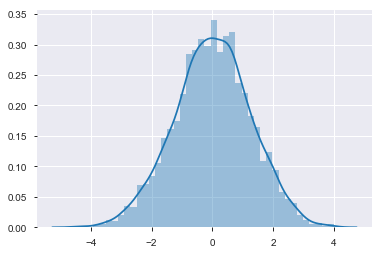

In [203]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

#### `To ensure residuals are random i.e. normally distributed, we use a Q-Q plot`

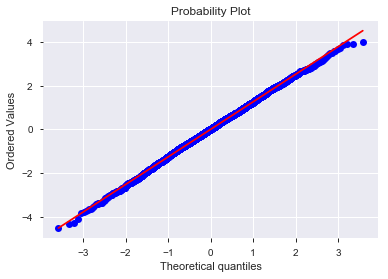

In [204]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

    From the above histogram and Q-Q plot it shows that residuals are normally distributed, hence we assume that this 
    assumption is not violated.

### `Assumption - Heteroscedasticity`

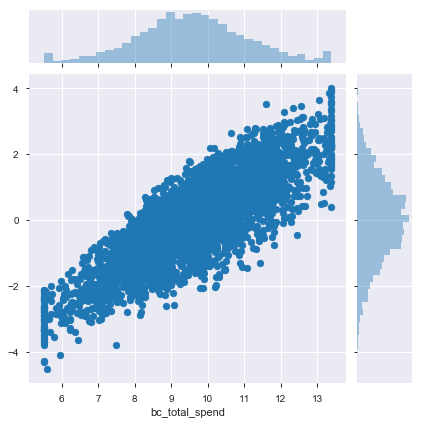

In [205]:
sns.jointplot(train_y,residuals)

    From the above plot, it shows that the relationship between residuals and Y is linear, hence we assume that this 
    assumption not violated.

### `Predicting sales on testing data & storing output`

In [207]:
df_rf=df_rf[feature_columns]

df_rf=sm.add_constant(df_rf)

df_rf.head(2)

C:\Users\naray\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,card2_2,card2_3,card_2,card_3,card_4,card_5,ed,gender_1,lncreddebt,lninc,reason_2
0,1.0,20,0,0,0,1,0,0,15,1,0.183079,3.433987,0
1,1.0,22,0,0,1,0,0,0,17,0,0.200505,2.708050,0


In [209]:
# Making final prediction on test file
from scipy.special import boxcox, inv_boxcox

pred_total_spend=inv_boxcox(lm.predict(df_rf),fitted_lambda)
pred_total_spend=pd.DataFrame(pred_total_spend.tolist())
pred_total_spend.columns = ['pred_total_spend']


#Concatenating final prediction with original test file
  
testfile = pd.concat([credit_df, pred_total_spend], axis=1)

testfile.head()

C:\Users\naray\Desktop\Case Studies\1. Predicting Credit Card Spend & Identifying Key Drivers


,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,pred_total_spend
0,1,2.0,1,20,2,September,15,3,1,1,...,0,1,1,0,0,0,1,0,149.46,372.303626
1,5,5.0,0,22,2,May,17,4,2,0,...,1,1,1,1,1,0,0,0,77.54,302.061629
2,3,4.0,1,67,6,June,14,2,2,0,...,0,0,0,0,1,0,0,0,359.97,480.932934
3,4,3.0,0,23,2,May,16,3,2,0,...,1,1,1,0,1,1,0,0,359.41,271.020337
4,2,2.0,0,26,3,July,16,3,2,0,...,1,0,1,0,0,0,1,0,507.83,336.914875


In [212]:
#Exporting testfile to csv for final submission

%cd C:\\Users\\naray\\Desktop\\Case Studies\\1. Predicting Credit Card Spend & Identifying Key Drivers

testfile.to_csv('testfile_submission.csv',index=False)

C:\Users\naray\Desktop\Case Studies\1. Predicting Credit Card Spend & Identifying Key Drivers
